# Tutorial
Load the numpy and pylab library under shortcuts `np` and `pl`

In [1]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Set the size of the domain:

In [2]:
itot = 512
jtot = 384
i,j = np.meshgrid(np.arange(0,itot), np.arange(0,jtot))
ii = i[:,:itot/2+1]
jj = j[:,:itot/2+1]
jj = np.where(jj<jtot/2+1, jj, jj-jtot)

Generate a field with random data:

In [3]:
a = np.random.rand(jtot, itot)

Plot the data:

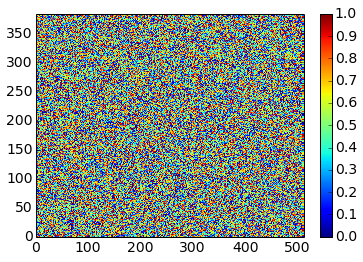

In [6]:
pl.pcolormesh(i,j,a);
pl.colorbar();
pl.xlim(0,itot);
pl.ylim(0,jtot);

Fourier transform the field:

In [7]:
afft = np.fft.rfft2(a)

Filter the data around a chosen wave number using a Gaussian filter with a given standard deviation

Show filter as illustration and plot the filtered data:

Mean = 1.86588893099e-06


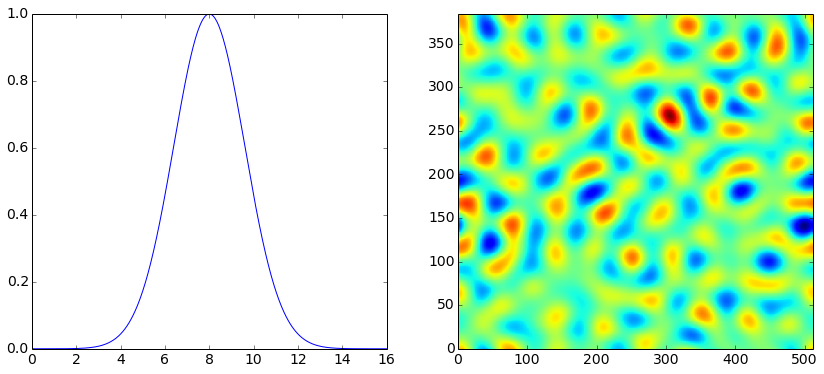

In [8]:
from IPython.html.widgets import interact, interactive
from IPython.html import widgets
kk = np.sqrt(ii**2 + jj**2)
def filter(kmn = 8., ksd = 1.):
    # wave number kmn
    # standard deviation guassian ksd
    f,ax = subplots(1,2)
    f.set_figwidth(14)
    f.set_figheight(6)
    alpha = np.exp( -(kk - kmn)**2 / (2.*ksd**2) )
    afft_filter = alpha * afft
    a_filter = np.fft.irfft2(afft_filter)
    print("Mean = {0}".format(a_filter.mean()))
    ktest = np.linspace(0, 16., 1000)
    ftest = np.exp(-(ktest - kmn)**2 / (2.*ksd**2) )
    ax[0].plot(ktest, ftest)
    ax[1].pcolormesh(i, j, a_filter)
    ax[1].set_xlim(0, itot)
    ax[1].set_ylim(0, jtot)
interact(filter, kmn = (1.0,20.0,1.), ksd = (0.1, 3.0, 0.1));